<a href="https://colab.research.google.com/github/warn4n/dl2025/blob/main/Notebooks/Chap15/15_2_Wasserstein_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 15.2: Wasserstein Distance**

This notebook investigates the GAN toy example as illustrated in figure 15.1 in the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from scipy.optimize import linprog

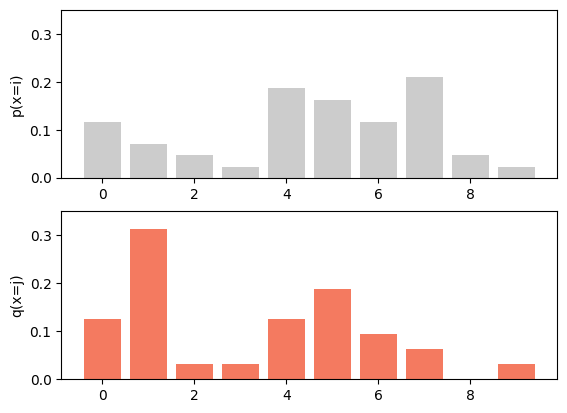

In [3]:
# Define two probability distributions
p = np.array([5, 3, 2, 1, 8, 7, 5, 9, 2, 1])
q = np.array([4, 10,1, 1, 4, 6, 3, 2, 0, 1])
p = p/np.sum(p);
q=  q/np.sum(q);

# Draw those distributions
fig, ax =plt.subplots(2,1);
x = np.arange(0,p.size,1)
ax[0].bar(x,p, color="#cccccc")
ax[0].set_ylim([0,0.35])
ax[0].set_ylabel("p(x=i)")

ax[1].bar(x,q,color="#f47a60")
ax[1].set_ylim([0,0.35])
ax[1].set_ylabel("q(x=j)")
plt.show()

In [16]:
# TODO Define the distance matrix from figure 15.8d
# The index should be normalized before being used in the distance calculation.
# Replace this line
dist_mat = np.zeros((10,10))
for i in range(10):
  for j in range(10):
    dist_mat[i,j] = abs(i-j) / 9
# vectorize the distance matrix
c = dist_mat.flatten()

In [17]:
# Define pretty colormap
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

def draw_2D_heatmap(data, title, my_colormap):
  # Make grid of intercept/slope values to plot
  xv, yv = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
  fig,ax = plt.subplots()
  fig.set_size_inches(4,4)
  plt.imshow(data, cmap=my_colormap)
  ax.set_title(title)
  ax.set_xlabel('$q$'); ax.set_ylabel('$p$')
  plt.show()

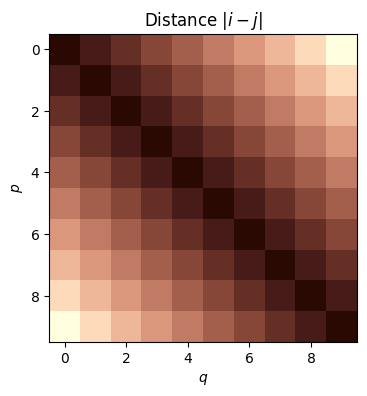

In [18]:
draw_2D_heatmap(dist_mat,r'Distance $|i-j|$', my_colormap)

In [19]:
# Define b to be the verticalconcatenation of p and q
b = np.hstack((p,q))[np.newaxis].transpose()

In [20]:
# TODO:  Now construct the matrix A that has the initial distribution constraints
# so that A @ TPFlat=b where TPFlat is the transport plan TP vectorized rows first so TPFlat = np.flatten(TP)
# Replace this line:
A = np.zeros((20,100))
for i in range(10):
  for j in range(10):
    A[i, i*10+j] = 1
    A[i+10, j*10+i] = 1


In [21]:
print(A)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Now we have all of the things we need.  The vectorized distance matrix $\mathbf{c}$,  the constraint matrix $\mathbf{A}$, the vectorized and concatenated original distribution $\mathbf{b}$.  We can run the linear programming optimization.

In [22]:
# We don't need the constraint that p>0 as this is the default
opt = linprog(c, A_eq=A, b_eq=b)
print(opt)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 0.15148578811369506
              x: [ 1.163e-01  0.000e+00 ...  0.000e+00  2.326e-02]
            nit: 24
          lower:  residual: [ 1.163e-01  0.000e+00 ...  0.000e+00
                              2.326e-02]
                 marginals: [ 0.000e+00  2.222e-01 ...  2.222e-01
                              0.000e+00]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                             -4.163e-17]
                 marginals: [-7.778e-01 -6.667e-01 ... -1.111e-01
                             -0.000e+00]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mi

Extract the answer and display

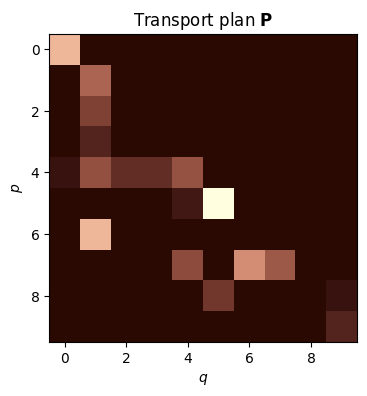

In [23]:
TP = np.array(opt.x).reshape(10,10)
draw_2D_heatmap(TP,r'Transport plan $\mathbf{P}$', my_colormap)

In [24]:
TP

array([[ 0.11627907,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.06976744,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.04651163,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.02325581,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00872093,  0.05668605,  0.03125   ,  0.03125   ,  0.05813953,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01380814,
         0.14898256,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.11627907,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [25]:
TP[9]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02325581])

Compute the Wasserstein distance


In [26]:
was = np.sum(TP * dist_mat)
print("Your Wasserstein distance = ", was)
print("Correct answer =  0.15148578811369506")

Your Wasserstein distance =  0.1514857881136951
Correct answer =  0.15148578811369506


TODO -- Compute the

*   Forward KL divergence $D_{KL}[p,q]$ between these distributions
*   Reverse KL divergence $D_{KL}[q,p]$ between these distributions
*  Jensen-Shannon divergence $D_{JS}[p,q]$ between these distributions

What do you conclude?

In [30]:
p

array([0.11627907, 0.06976744, 0.04651163, 0.02325581, 0.18604651,
       0.1627907 , 0.11627907, 0.20930233, 0.04651163, 0.02325581])

In [31]:
q

array([0.125  , 0.3125 , 0.03125, 0.03125, 0.125  , 0.1875 , 0.09375,
       0.0625 , 0.     , 0.03125])

In [32]:
3-9

-6

In [33]:
forward_kl = np.sum(p * np.log(p/q))

/tmp/ipython-input-33-1293136781.py:1: RuntimeWarning: divide by zero encountered in divide
  forward_kl = np.sum(p * np.log(p/q))


In [34]:
reverse_kl = np.sum(q * np.log(q/p))

/tmp/ipython-input-34-1846957650.py:1: RuntimeWarning: divide by zero encountered in log
  reverse_kl = np.sum(q * np.log(q/p))
/tmp/ipython-input-34-1846957650.py:1: RuntimeWarning: invalid value encountered in multiply
  reverse_kl = np.sum(q * np.log(q/p))


In [35]:
jensen_shannon = (forward_kl + reverse_kl)/2

In [36]:
forward_kl, reverse_kl, jensen_shannon

(np.float64(inf), np.float64(nan), np.float64(nan))